# About the Dataset

In the data set we have 37 independent parameters of 4,
424 candidates who went to college. 
Some of them Graduated, some dropped out and some did not graduate.

# Objective 
Our objective is to do a classification using 4 different techniques which are KNN algorithm, 
Decision Tree, Random Forest and XGBoost and we will finally evaluate which is the best technique for our data set.

In [72]:
## importing required packages
import numpy as np
import pandas as pd

pd.options.display.max_columns =None
pd.options.display.max_rows =10

In [3]:
#loading the data
df=pd.read_csv("/Users/deblinamandal/Desktop/IMI KOLKATA/Colg/term5/data analytics/MidTermAssignment/data.csv",delimiter=';')

df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Size of the dataset
df.shape

(4424, 37)

In [5]:
#Examining the column names and the datatypes
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
                                                   ...   
Curricular units 2nd sem (without evaluations)      int64
Unemployment rate                                 float64
Inflation rate                                    float64
GDP                                               float64
Target                                             object
Length: 37, dtype: object

In [6]:
#Finding out missing values in each column
print (df.isna().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
                                                 ..
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target                                            0
Length: 37, dtype: int64


In [7]:
#Finding rows that have duplicate values
df[df.duplicated(keep = 'last')] 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


In [8]:
#finding correlation using pearson method
df.corr(method='pearson')

/var/folders/yr/bsyz31pj1rz8cb3gzr0qtnfw0000gn/T/ipykernel_57150/4174862556.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Curricular units 2nd sem (grade),-0.071506,-0.115424,0.055517,0.348728,0.050493,0.000942,0.053239,-0.008497,-0.031175,-0.008083,-0.020724,-0.016424,0.074402,0.069087,-0.012761,-0.139424,0.296480,-0.199133,0.181227,-0.173419,0.001460,0.132971,0.361959,0.355036,0.685560,0.837170,-0.061482,0.129770,0.395135,0.453394,0.760804,1.000000,-0.079216,0.001462,-0.038166,0.071269
Curricular units 2nd sem (without evaluations),0.020426,0.047983,-0.015757,0.030816,-0.004229,0.005102,-0.019015,-0.014041,0.021305,-0.007430,0.013091,-0.007664,-0.013254,-0.035959,-0.007491,0.048552,-0.071817,0.057223,-0.048723,0.061654,-0.010660,0.055256,0.069547,0.134296,-0.053983,-0.066076,0.583261,0.070148,0.067697,0.144877,-0.061567,-0.079216,1.000000,-0.013960,-0.034391,-0.080292
Unemployment rate,-0.020338,0.089080,-0.098419,0.007153,0.061974,0.111958,0.045222,-0.000651,-0.114351,-0.077905,-0.092057,-0.101215,0.038756,-0.130327,0.046131,0.021128,0.013460,0.022195,0.055152,0.025018,-0.010015,0.009778,0.038404,0.061545,0.051286,0.014821,-0.045144,0.010580,0.064436,0.045808,0.048805,0.001462,-0.013960,1.000000,-0.028885,-0.335178
Inflation rate,0.008761,-0.016375,-0.011133,0.017710,-0.024043,-0.063736,0.0

In [9]:
#Graduation Status Count
df['Target'].value_counts()# for checking blanced or not 

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [65]:
#Marital Status Count
df['Marital status'].value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64

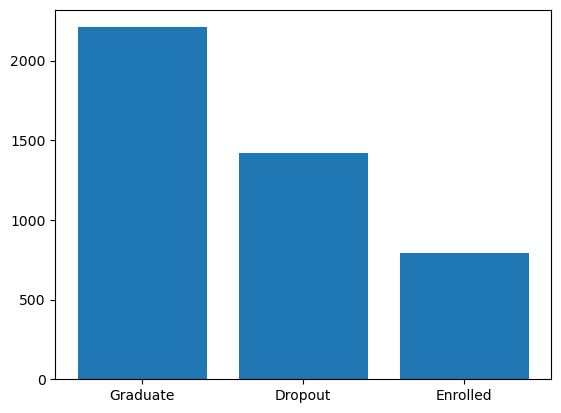

In [10]:
#Bar Chart for Target Variable count
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Graduate", "Dropout", "Enrolled"])
#y = np.array([2209, 1421, 794])
y = np.array(df['Target'].value_counts())
plt.bar(x,y)
plt.show()

<Axes: xlabel='Marital status'>

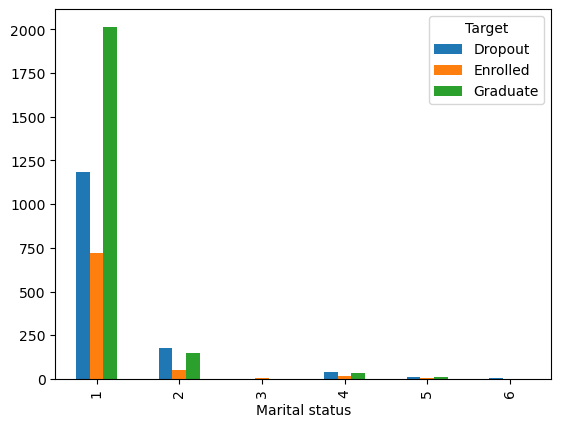

In [64]:
#Graduation status with respect to marital status crosstab 
pd.crosstab(index=df['Marital status'], columns=df.Target).plot(kind='bar')

array([<Axes: ylabel='Target'>], dtype=object)

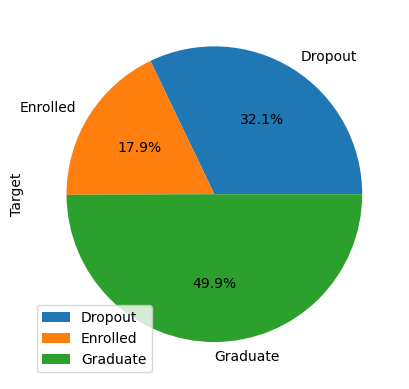

In [66]:
#Pie Chart for Target Variable count
pd.crosstab(df.Target, ['Target']).plot(kind='pie', subplots=True, autopct='%1.1f%%')

<Axes: xlabel='Application mode', ylabel='count'>

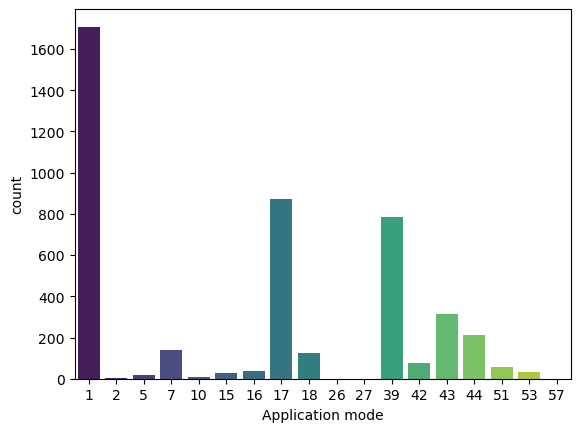

In [67]:
#count of different application modes 
sns.countplot(x=df['Application mode'], data=df, palette='viridis')

<Axes: xlabel='Daytime/evening attendance\t'>

/Users/deblinamandal/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/Users/deblinamandal/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


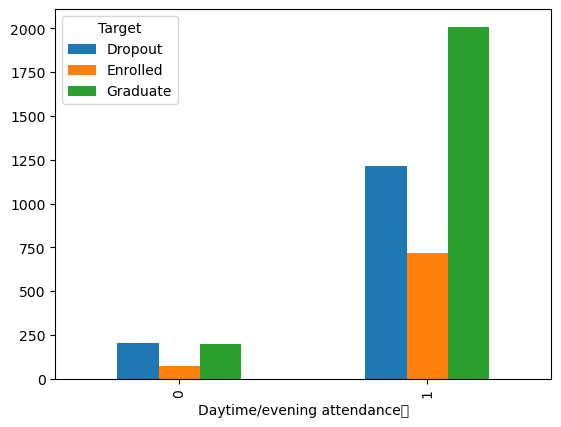

In [68]:
#Cross Tablulation of student enrollment status based on morning and evening attendance
pd.crosstab(index=df['Daytime/evening attendance\t'], columns=df.Target).plot(kind='bar')

<Axes: xlabel='Unemployment rate', ylabel='Count'>

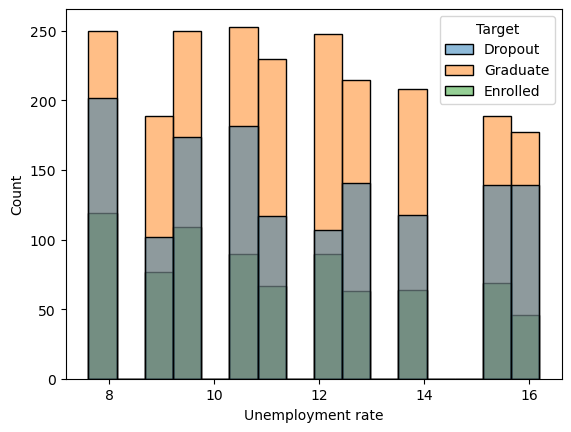

In [70]:
#Graduation Status vs Unemployment Rate histogram
sns.histplot(x='Unemployment rate',data=df,hue='Target')

<Axes: xlabel='Inflation rate', ylabel='Count'>

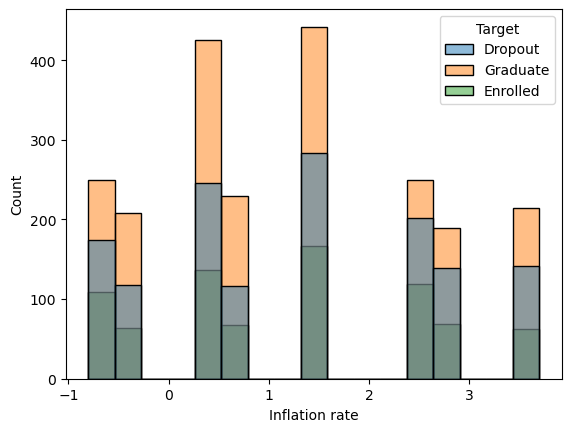

In [71]:
#Graduation Status vs Inflation Rate 
sns.histplot(x='Inflation rate',data=df,hue='Target')# Maximum number of student are in the range of 0-1% inflation region.

In [14]:
#Feature Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Target_Enc'] = df['Target'].map({'Graduate':0, 'Dropout':1,'Enrolled':2}).astype(int)


In [15]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Enc
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0


In [16]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
# 2.4.1 Instantiate object

ss = StandardScaler()

#abc=["Marital status","Daytime/evening attendance\t","Educational special needs","Tuition fees up to date","Gender","Scholarship holder","Age at enrollment"]
abc=["Age at enrollment"]
scaled_data=ss.fit_transform(df[abc])
ScaledColumn=pd.DataFrame(scaled_data,columns=["Age_at_enrollment_enc"])
ScaledColumn.head()

,Age_at_enrollment_enc
0,-0.430363
1,-0.562168
2,-0.562168
3,-0.430363
4,2.864765


In [17]:
#Adding the scaled variable to the original dataframe
df_new=pd.concat([df,ScaledColumn],
                  axis = 1)

In [18]:
df_new.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Enc,Age_at_enrollment_enc
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1,-0.430363
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0,-0.562168
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1,-0.562168
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0,-0.430363
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0,2.864765


In [19]:
df_new.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Enc,Age_at_enrollment_enc
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,0,-0.562168
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,1,-0.693973
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,1,0.887688
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,0,-0.430363
4423,1,10,1,9773,1,1,152.0,22,38,37,5,9,152.0,1,0,0,1,0,0,22,1,0,6,8,6,11.666667,0,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate,0,-0.166753


In [20]:
#Based on our observation the variables taken in X can have impact on our target variable Y 
from sklearn.model_selection import train_test_split

y=df_new['Target_Enc']
x = df_new[["Marital status","Daytime/evening attendance\t","Educational special needs","Tuition fees up to date","Gender","Scholarship holder","Age_at_enrollment_enc"]]

In [21]:
#Dividing the Dataset into training and testing

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) #70% training part

# KNN ALGORITHM

In [23]:

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

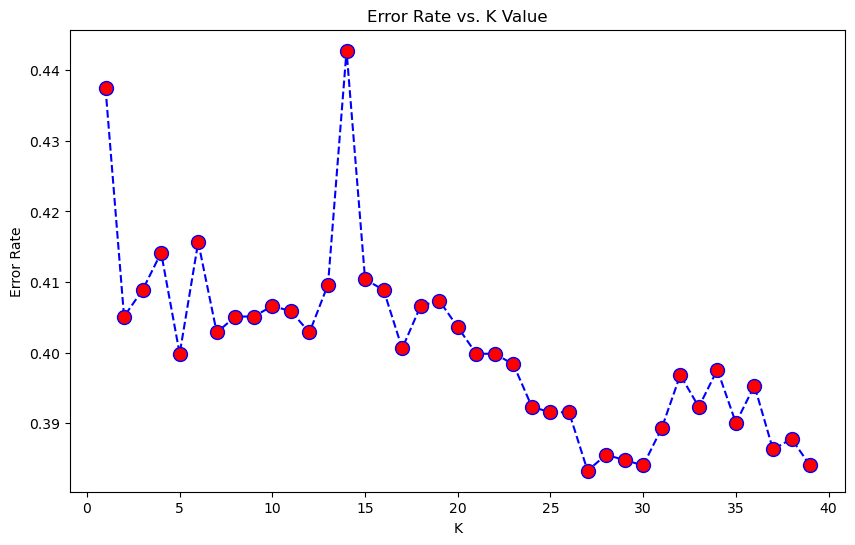

Minimum error:- 0.3832831325301205 at K = 27


In [24]:
error_rate = []
for i in range(1,40): 
 knn = KNeighborsClassifier(n_neighbors=i) #defining KNN Claasifier to check for the Neigbours required for minimum error rate
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [25]:
knn = KNeighborsClassifier(n_neighbors=27, metric='euclidean') #At k=27 the error rate is minimum
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=27)

In [26]:
y_pred = knn.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[566,  96,   1],
       [174, 253,   0],
       [177,  61,   0]])

In [28]:
accuracy_score(y_test, y_pred) 

0.6167168674698795

In [29]:
precision_score(y_test, y_pred,average='weighted') # used param weighted because target has multiparameter 


0.5065615956124415

In [30]:
recall_score(y_test, y_pred,average='weighted')

0.6167168674698795

In [31]:
f1_score(y_test, y_pred,average='weighted')

0.5520698168564644

# Performance Evaluation of KNN Model
Based on the accuracy score ,61.67% of the instances were correctly predicted by the KNN model.
A precision of 50.66% suggests that when the model predicts a positive outcome, it is correct about 50.66% of the  time.
A recall of 61.67% means that the model is able to capture about 61.67% of the actual positive instances.
An F1 Score of 55.08% indicates a trade-off between precision and recall.

# DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree


In [33]:
ct = dtree(
           criterion="gini",    
           max_depth=None       
                              # 'None' means full tree till single leaf
           )

In [34]:
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred = ct.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[583,  58,  22],
       [198, 211,  18],
       [185,  42,  11]])

In [37]:
accuracy_score(y_test, y_pred)

0.6061746987951807

In [38]:
precision_score(y_test, y_pred,average='weighted')

0.5581083120001726

In [39]:
recall_score(y_test, y_pred,average='weighted') 

0.6061746987951807

In [40]:
f1_score(y_test, y_pred,average='weighted')

0.554851514595098

[Text(0.49107142857142855, 0.9, 'node #0\nTuition fees up to date <= 0.5\ngini = 0.615\nsamples = 3096\nvalue = [1546, 994, 556]\nclass = Graduate'),
 Text(0.26785714285714285, 0.7, 'node #1\nAge_at_enrollment_enc <= 0.295\ngini = 0.253\nsamples = 360\nvalue = [19, 309, 32]\nclass = Dropout'),
 Text(0.14285714285714285, 0.5, 'node #2\nScholarship holder <= 0.5\ngini = 0.377\nsamples = 193\nvalue = [18, 149, 26]\nclass = Dropout'),
 Text(0.07142857142857142, 0.3, 'node #3\nGender <= 0.5\ngini = 0.33\nsamples = 165\nvalue = [12, 133, 20]\nclass = Dropout'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'node #44\nAge_at_enrollment_enc <= -0.628\ngini = 0.582\nsamples = 28\nvalue = [6, 16, 6]\nclass = Dropout'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.5, 'node #61\nAge_at_enrollment_enc <= 1.613\ngini = 0.081\nsamples = 167\nvalue 

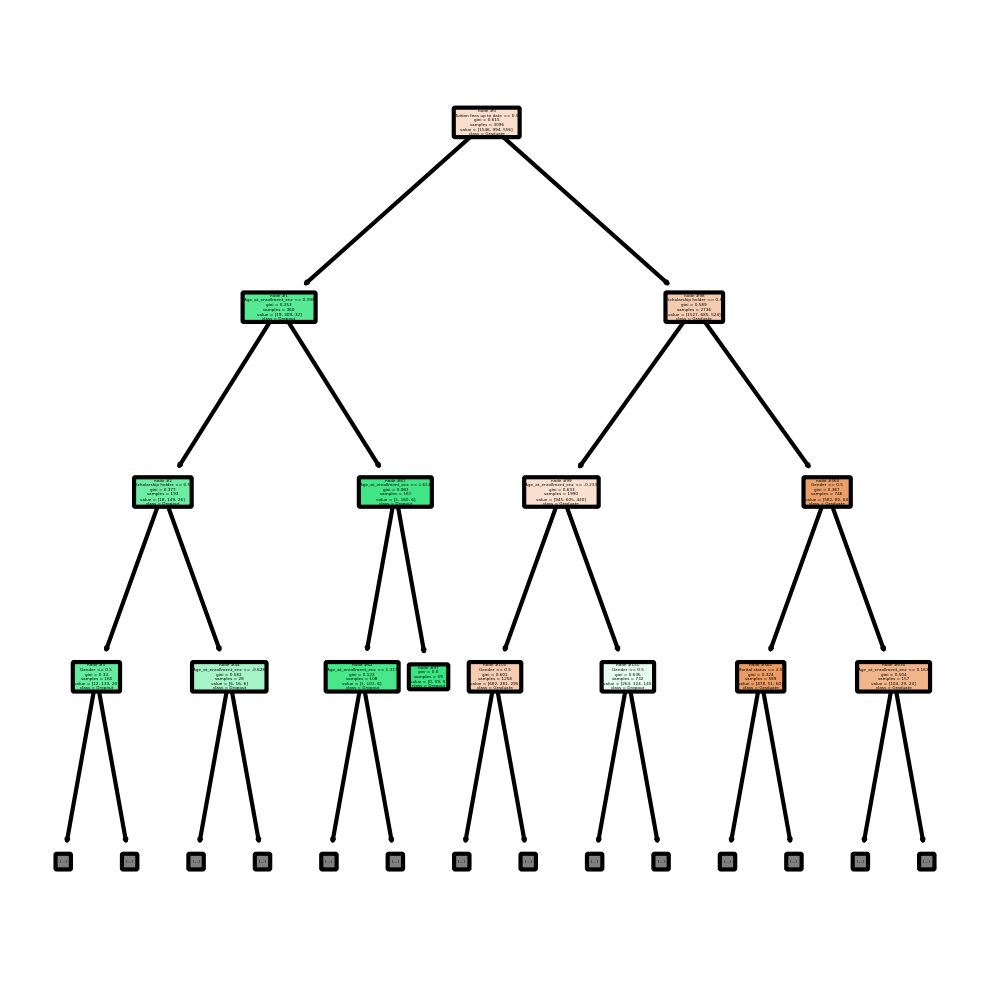

In [41]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300) 
tree.plot_tree(ct, max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Marital status","Daytime/evening attendance\t","Educational special needs","Tuition fees up to date","Gender","Scholarship holder","Age_at_enrollment_enc"],
            class_names = ['Graduate','Dropout','Enrolled']
              )

# Performance Evaluation of Decision Tree
Based on the accuracy score ,60.61% of the instances were correctly predicted by the Decision Tree.
A precision of 55.08% suggests that when the model predicts a positive outcome, it is correct about 55.08% of the  time.
A recall of 60.62% means that the model is able to capture about 60.62% of the actual positive instances.
An F1 Score of 55.05% indicates a trade-off between precision and recall.

# RANDOM FOREST

In [42]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,y_train)

y_pred1=clf1.predict(X_test)

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.6099397590361446


In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred1)

array([[576,  63,  24],
       [186, 221,  20],
       [179,  46,  13]])

In [45]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.61      0.87      0.72       663
           1       0.67      0.52      0.58       427
           2       0.23      0.05      0.09       238

    accuracy                           0.61      1328
   macro avg       0.50      0.48      0.46      1328
weighted avg       0.56      0.61      0.56      1328



In [46]:
print ("Precision ", precision_score(y_test, y_pred1,average='weighted'))
print ("Recall ",recall_score(y_test, y_pred1,average='weighted'))
print ("F1 Score ",f1_score(y_test, y_pred1,average='weighted'))

Precision  0.5618022600395531
Recall  0.6099397590361446
F1 Score  0.562096543073326


In [47]:
import pandas as pd
feature_imp = pd.Series(clf1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Age_at_enrollment_enc           0.461320
Tuition fees up to date         0.262316
Scholarship holder              0.120337
Gender                          0.069327
Marital status                  0.055731
Daytime/evening attendance\t    0.022196
Educational special needs       0.008772
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/deblinamandal/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


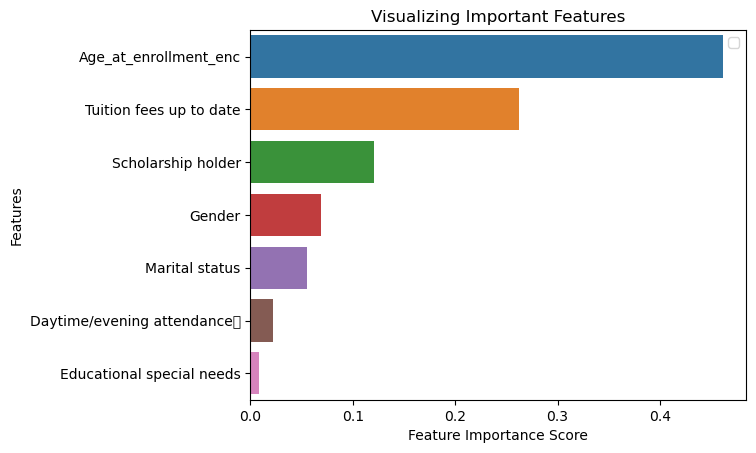

In [48]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

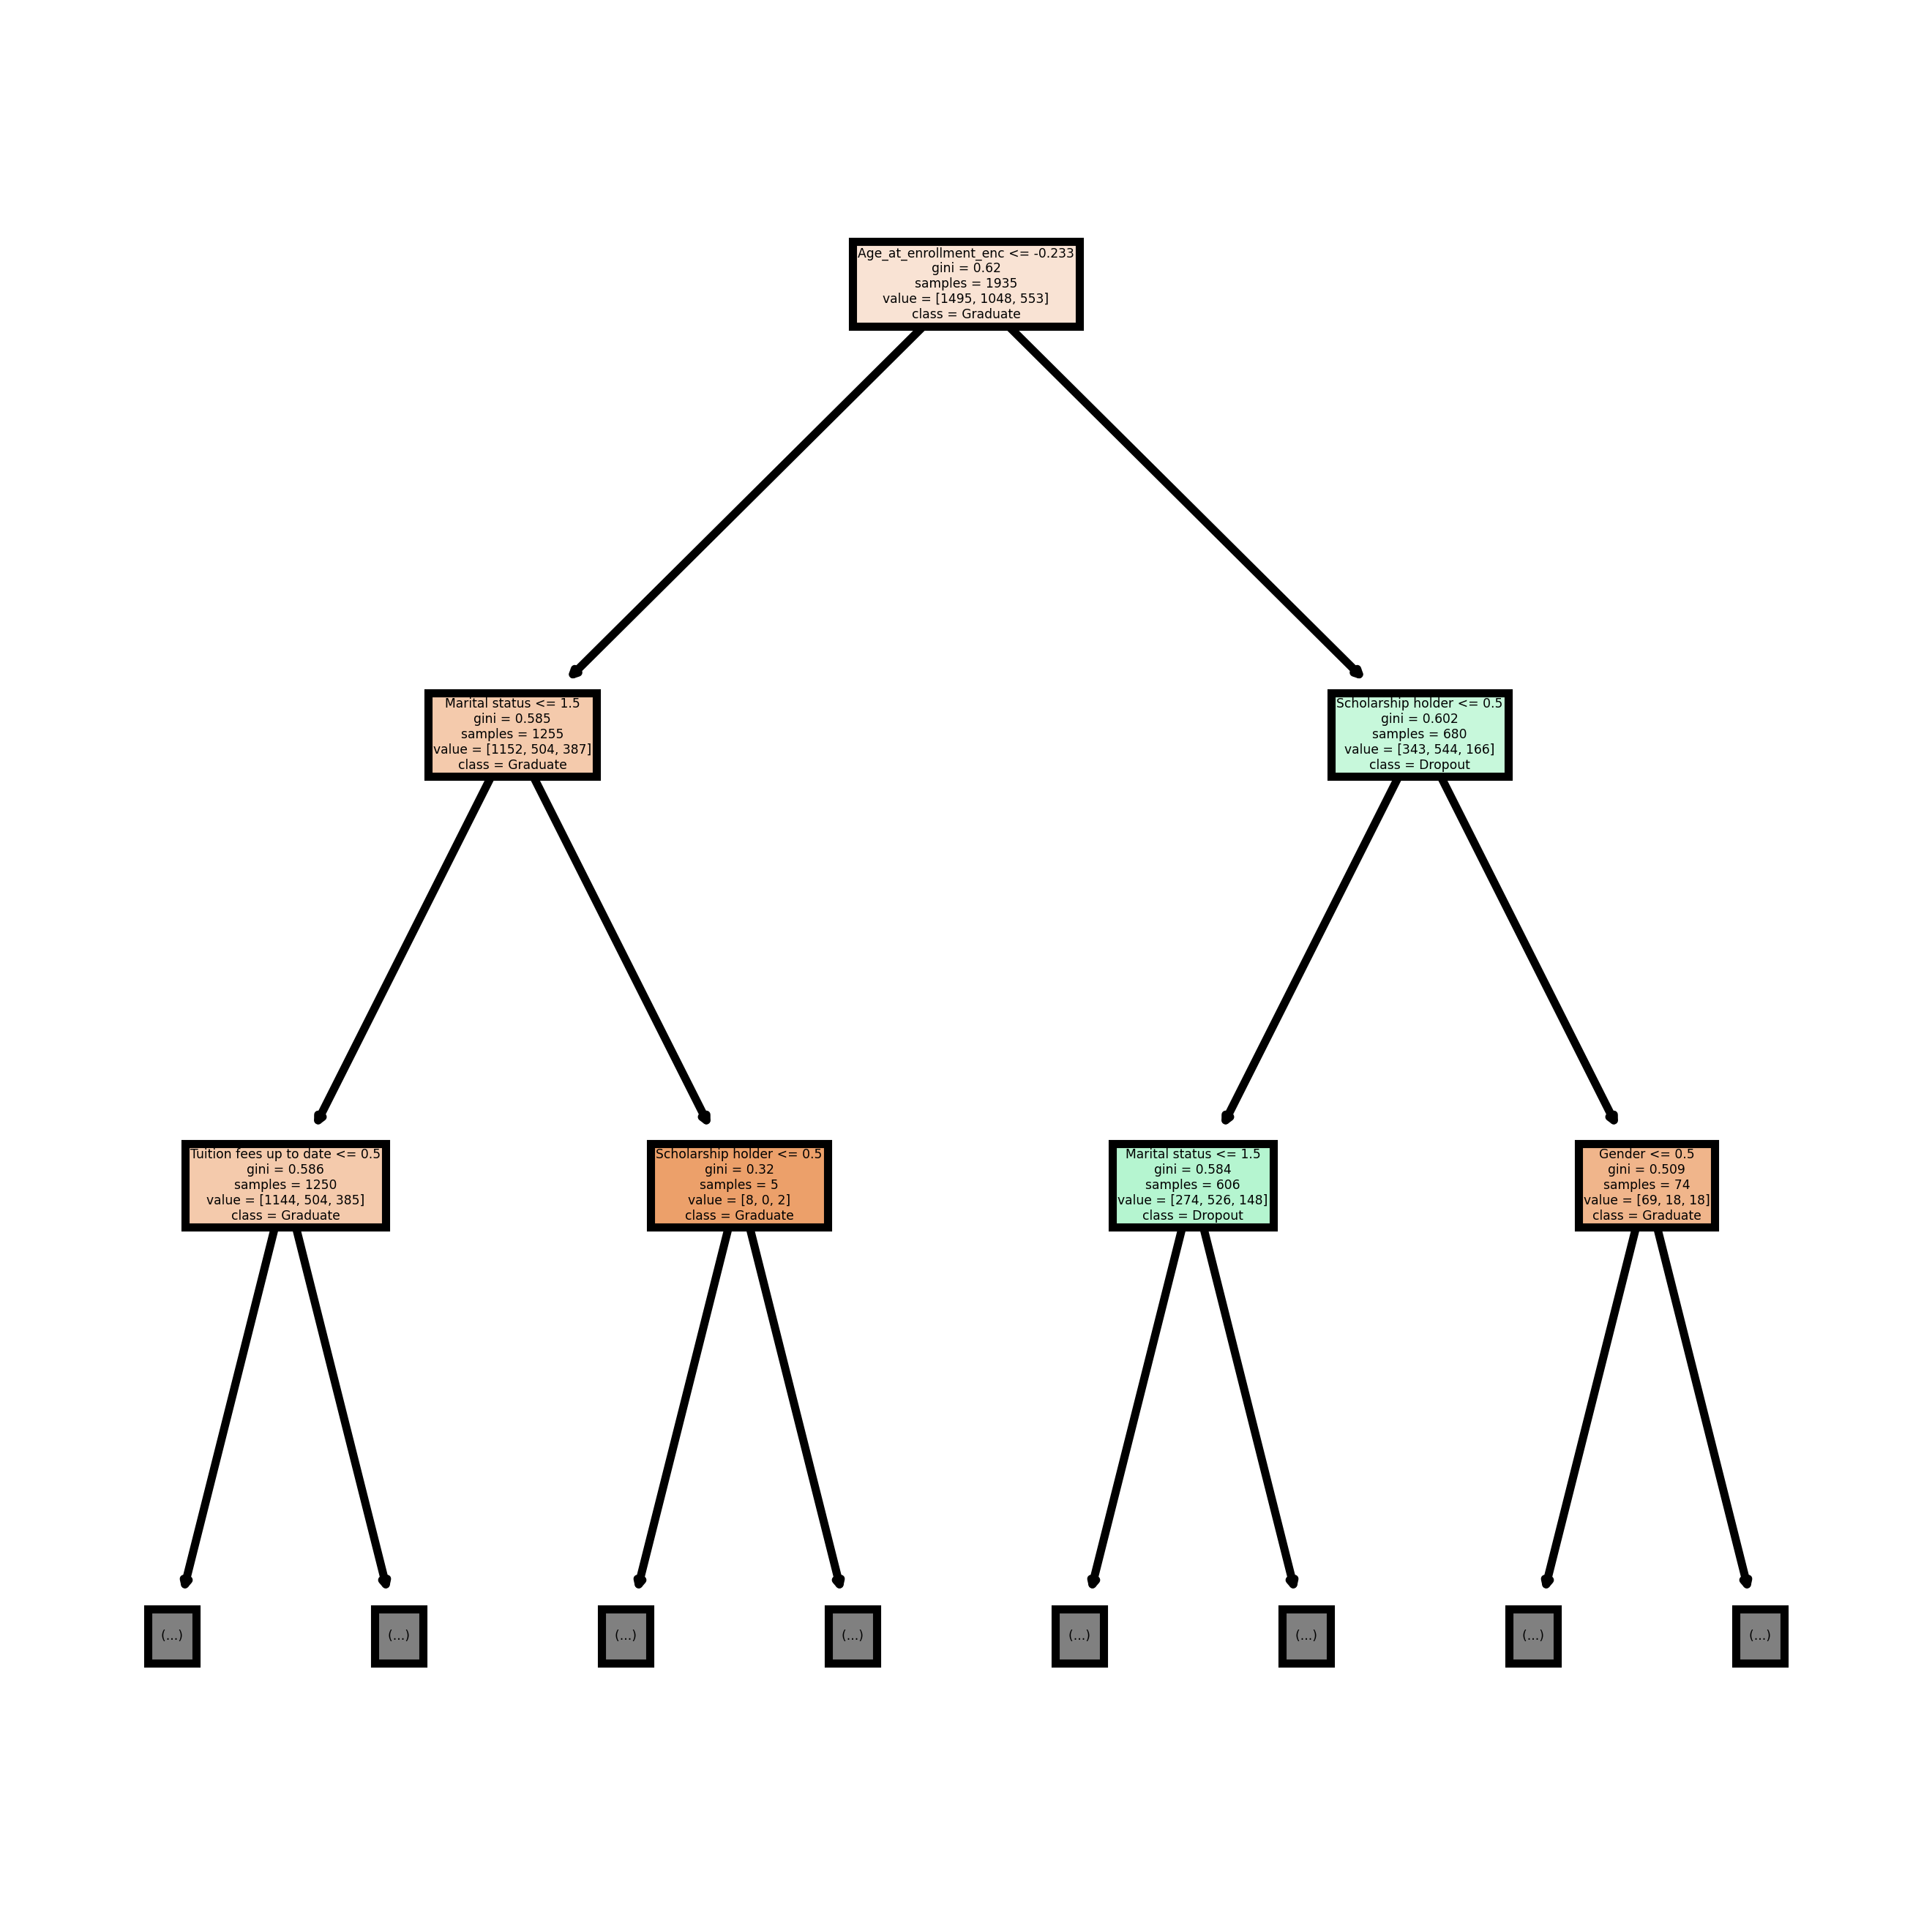

In [49]:
fn=X_train.columns
cn=['Graduate','Dropout','Enrolled']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf1.estimators_[0],
               max_depth=2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

/Users/deblinamandal/anaconda3/lib/python3.11/site-packages/sklearn/tree/_export.py:677: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
/Users/deblinamandal/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


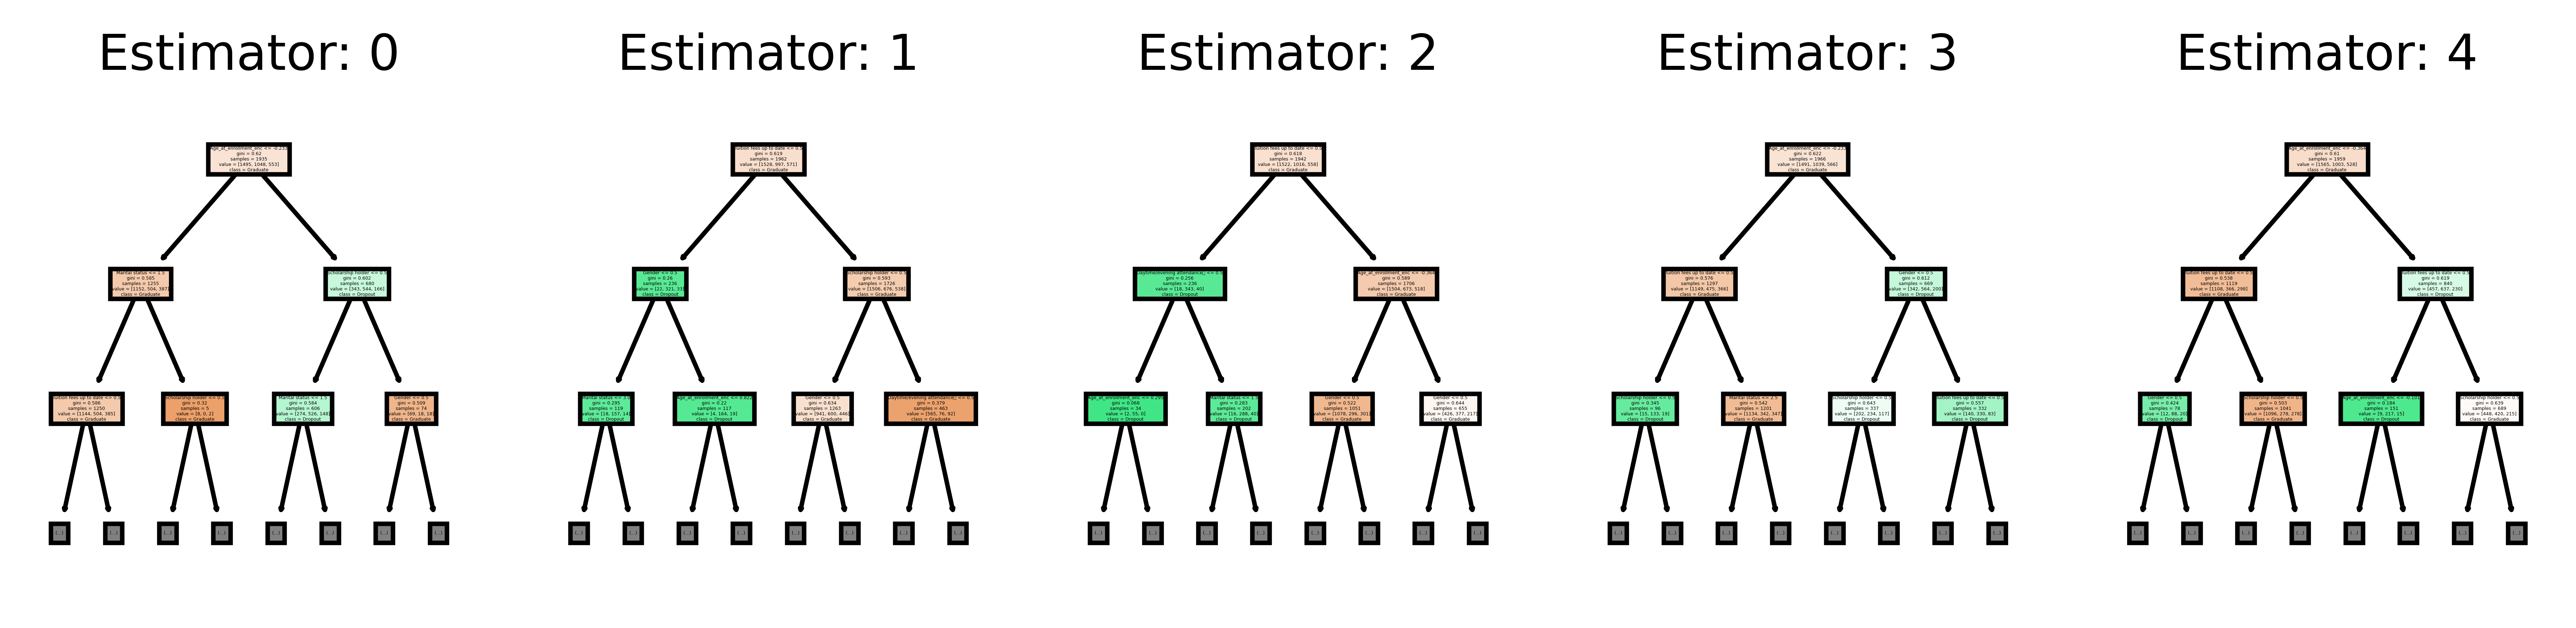

In [50]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf1.estimators_[index],
                   max_depth=2,
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# Performance Evaluation of Random Forest
Based on the accuracy score ,60.08% of the instances were correctly predicted by the Random Forest.
A precision of 56.08% suggests that when the model predicts a positive outcome, it is correct about 56.08% of the  time.
A recall of 60.84% means that the model is able to capture about 60.84% of the actual positive instances.
An F1 Score of 56.28% indicates a trade-off between precision and recall.

# XGBOOST

In [51]:
#Import XGBoost
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [52]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [53]:
y_pred = model.predict(X_test)

In [54]:
confusion_matrix(y_test, y_pred)

array([[572,  71,  20],
       [188, 227,  12],
       [185,  47,   6]])

In [55]:
accuracy_score(y_test, y_pred)

0.6061746987951807

In [56]:
precision_score(y_test, y_pred,average='weighted')

0.5420485745969604

In [57]:
recall_score(y_test, y_pred,average='weighted')

0.6061746987951807

In [58]:
f1_score(y_test, y_pred,average='weighted')

0.5520676146196283

In [59]:
X_train.columns

Index(['Marital status', 'Daytime/evening attendance\t',
       'Educational special needs', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age_at_enrollment_enc'],
      dtype='object')

In [60]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )

In [61]:
# Fit to training set
gbc.fit(X_train, y_train)
 
# Predict on test set
pred_y = gbc.predict(X_test)
 
# accuracy
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.62


In [62]:
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Tuition fees up to date         0.762186
Scholarship holder              0.135509
Gender                          0.030217
Age_at_enrollment_enc           0.025567
Daytime/evening attendance\t    0.019815
Marital status                  0.016906
Educational special needs       0.009799
dtype: float32

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/deblinamandal/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


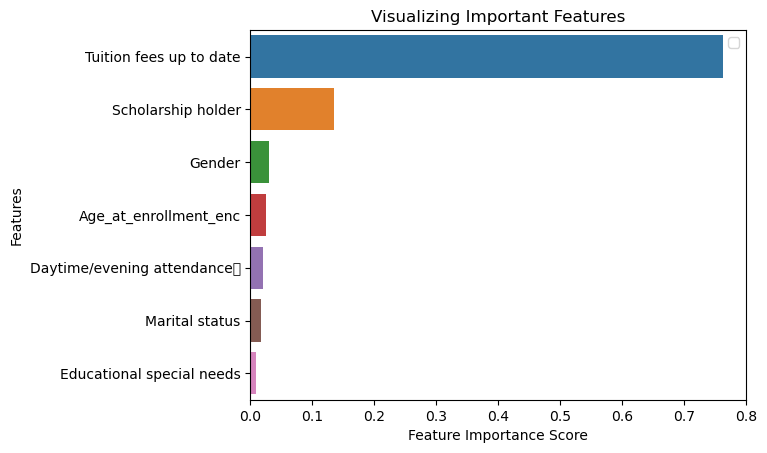

In [63]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Performance Evaluation of XGBOOST
Based on the accuracy score ,60.61% of the instances were correctly predicted by the XGBOOST.
A precision of 54.02% suggests that when the model predicts a positive outcome, it is correct about 54.02% of the  time.
A recall of 60.64% means that the model is able to capture about 60.62% of the actual positive instances.
An F1 Score of 55.21% indicates a trade-off between precision and recall.

# Interpretation based on Comparing the Evaluation Parameters of Different Models

                 Accuracy	    Precession 	 Recall 	    F Score 
KNN	             0.616716867	0.506561596	 0.616716867	0.550794278
Decision Tree	 0.606174699	0.55806161	 0.606174699	0.555257368
Random Forest	 0.608433735	0.560815844	 0.608433735	0.562795336
XGBoost	         0.606174699	0.542048575	 0.606174699	0.552067615

Accuracy: This measures the proportion of predictions that were correct. All of the models have a relatively high accuracy, with KNN having the highest accuracy of 61.67%.

Precision: This measures the proportion of positive predictions that were actually correct. XGBoost has the lowest precision of 54.20%, meaning that it is more likely to predict that a case is positive when it is actually negative.

Recall: This measures the proportion of actual positive cases that were correctly predicted as positive. KNN has the highest recall of 61.67%, meaning that it is more likely to correctly identify all of the positive cases.

F-Score: This is a harmonic mean of precision and recall, meaning that it takes into account both the ability of a model to correctly identify positive cases and the ability of a model to avoid incorrectly identifying negative cases as positive. Random Forest has the highest F-score of 0.5628, meaning that it is the best model at balancing precision and recall.

So we can see Random Forest is the best model for this task. It has the highest F-score, which means that it is the best at balancing precision and recall. However, it is important to note that all of the models have a relatively high accuracy, so the choice of model may depend on the specific requirements of the task.